<a id="A"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:90%; font-family:Pacifico; background-color:skyblue; overflow:hidden"><b> Alzheimers disease Analysis and Prediction </b></div>

<div style="text-align: center;">
    <img src="https://simshospitals.com/wp-content/uploads/2019/12/Alzheimer-Disease.jpg" alt="alzheimers" style="width:100%; height:auto; border-radius: 30px;">
</div>

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:90%; font-family:Pacifico; background-color:skyblue; overflow:hidden"><b> 1. Import Libraries </b></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

sns.set_theme(context='notebook', palette='pastel', style='whitegrid')

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:90%; font-family:Pacifico; background-color:skyblue; overflow:hidden"><b> 2. Load data </b></div>

In [1]:
df=pd.read_csv('/kaggle/input/alzheimers-disease-dataset/alzheimers_disease_data.csv')
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [2]:
df.shape

(2149, 35)

<a id="3"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:90%; font-family:Pacifico; background-color:skyblue; overflow:hidden"><b> 3. Data Statistics </b></div>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [4]:
df.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [5]:
# Drop unnecessary column from the DataFrame
df.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)

In [6]:
df.describe()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
sum(df.duplicated())

0

In [8]:
df.corr()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
Age,1.000000,0.028708,0.027745,-0.060560,-0.015677,0.020060,0.007323,-0.010249,-0.023386,0.049139,...,0.005508,0.012343,0.038973,-0.038658,0.009002,0.027523,-0.009470,0.013900,-0.019279,-0.005488
Gender,0.028708,1.000000,-0.003660,-0.007070,0.005928,0.016650,0.004330,-0.035795,0.010942,0.007310,...,0.033324,0.003880,0.006099,0.003865,-0.030583,0.017506,0.025919,-0.001636,-0.028537,-0.020975
Ethnicity,0.027745,-0.003660,1.000000,0.026516,-0.003176,0.031485,0.008363,0.020498,-0.018184,0.029304,...,-0.004704,0.003687,-0.019363,0.010475,0.022431,-0.018132,-0.030035,0.019363,-0.034619,-0.014782
EducationLevel,-0.060560,-0.007070,0.026516,1.000000,-0.023514,-0.009904,-0.012646,-0.016703,0.017412,0.020248,...,0.020269,-0.000165,0.010473,0.031934,-0.008168,-0.017568,-0.019950,0.013033,-0.008685,-0.043966
BMI,-0.015677,0.005928,-0.003176,-0.023514,1.000000,0.020437,-0.008997,0.000742,0.019922,-0.005975,...,-0.030501,0.029293,0.035276,-0.009788,-0.015859,-0.031840,-0.015901,-0.039400,0.071131,0.026343
Smoking,0.020060,0.016650,0.031485,-0.009904,0.020437,1.000000,0.008363,0.010760,-0.002048,-0.001145,...,-0.031879,0.020339,-0.014763,-0.029233,0.004498,-0.028403,-0.009977,0.001741,0.018011,-0.004865
AlcoholConsumption,0.007323,0.004330,0.008363,-0.012646,-0.008997,0.008363,1.000000,0.021696,0.020117,-0.003873,...,-0.016483,-0.029418,0.013657,-0.008250,-0.032798,0.015521,0.019117,-0.002712,-0.024121,-0.007618
PhysicalActivity,-0.010249,-0.035795,0.020498,-0.016703,0.000742,0.010760,0.021696,1.000000,0.011085,-0.001823,...,-0.002419,0.008709,-0.014253,-0.013324,-0.009397,-0.020407,-0.013629,0.031169,0.009837,0.005945
DietQuality,-0.023386,0.010942,-0.018184,0.017412,0.019922,-0.002048,0.020117,0.011085,1.000000,0.051295,...,-0.009700,0.012537,-0.014033,-0.007888,0.002628,-0.026271,0.029087,0.045737,0.006175,0.008506
SleepQuality,0.049139,0.007310,0.029304,0.020248,-0.005975,-0.001145,-0.003873,-0.001823,0.051295,1.000000,...,0.029589,-0.016807,-0.019899,0.014535,0.013508,0.019467,-0.016892,0.011237,0.002930,-0.056548


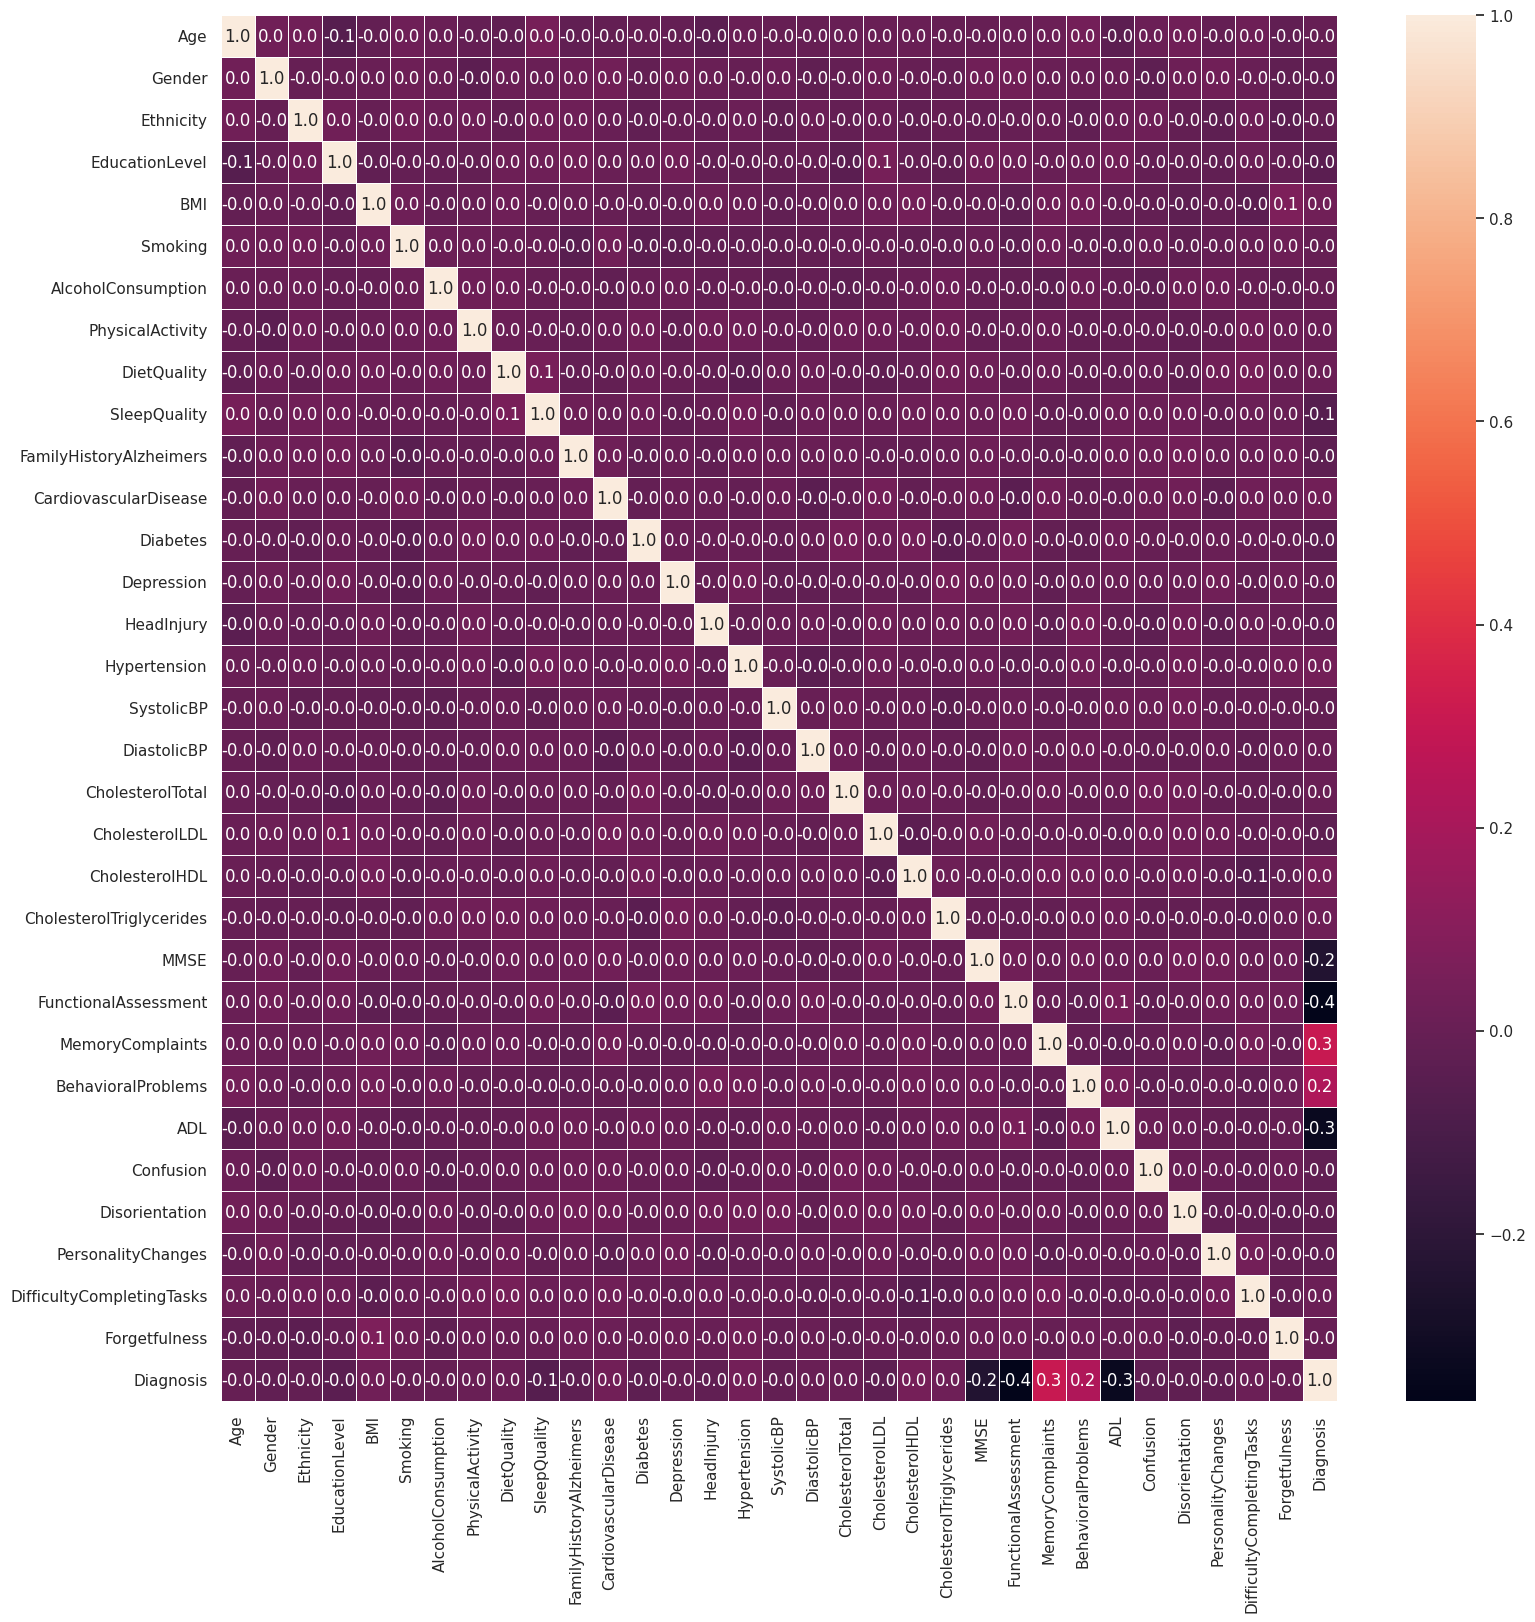

In [9]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

<a id="4"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:90%; font-family:Pacifico; background-color:skyblue; overflow:hidden"><b> 4. Data Visualization </b></div>

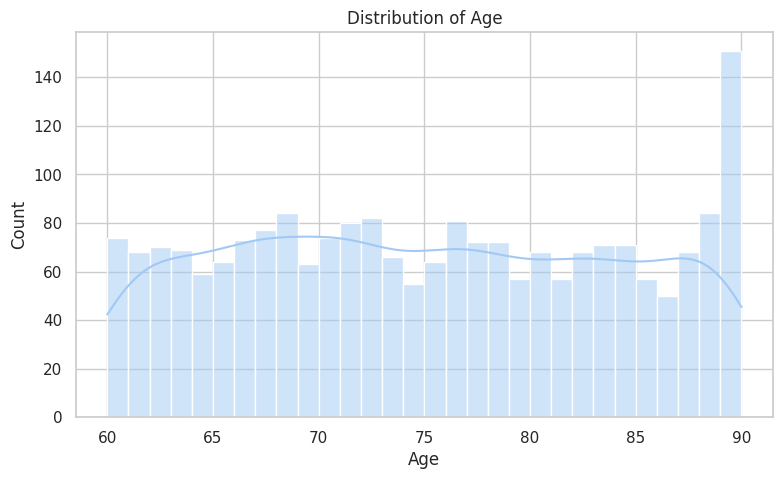

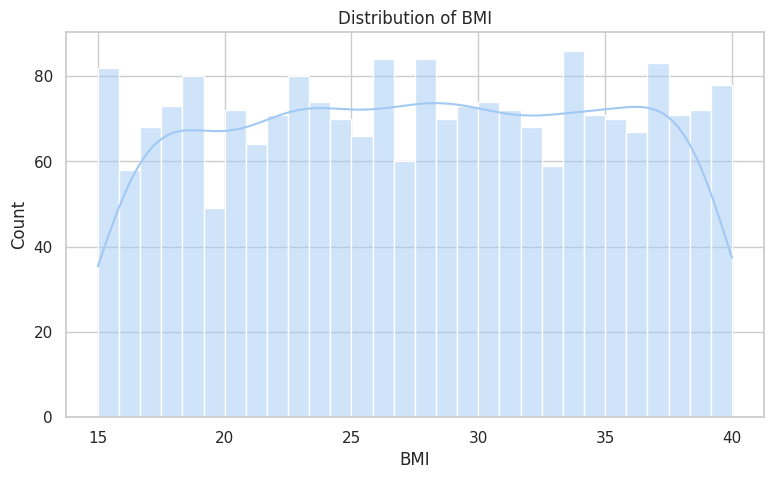

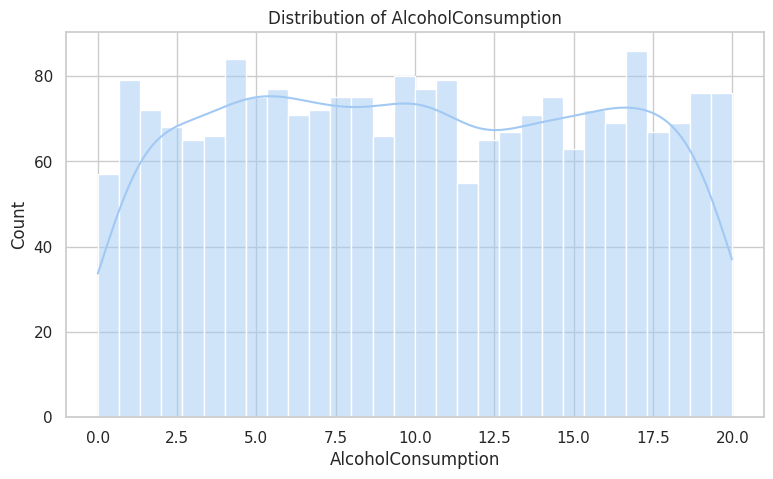

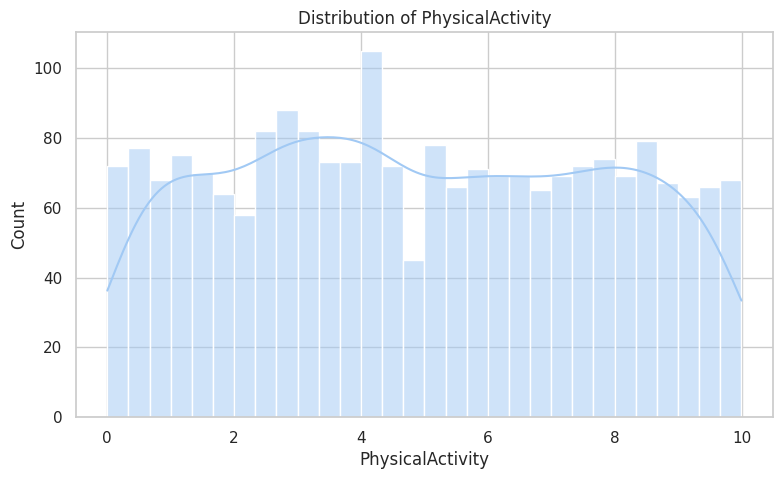

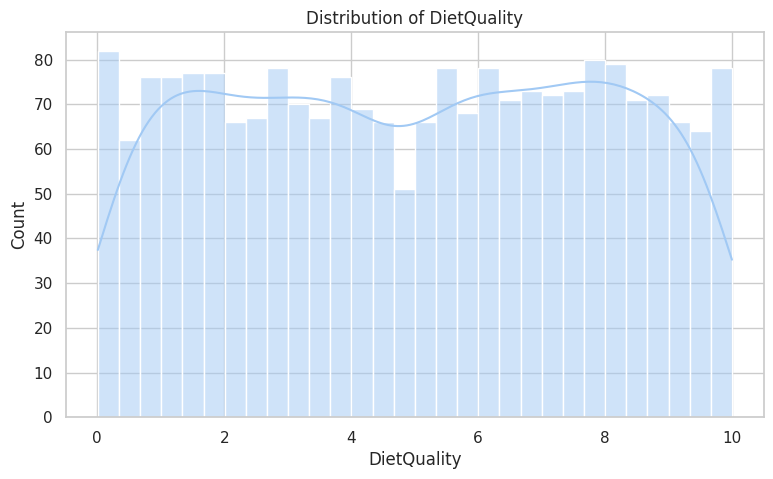

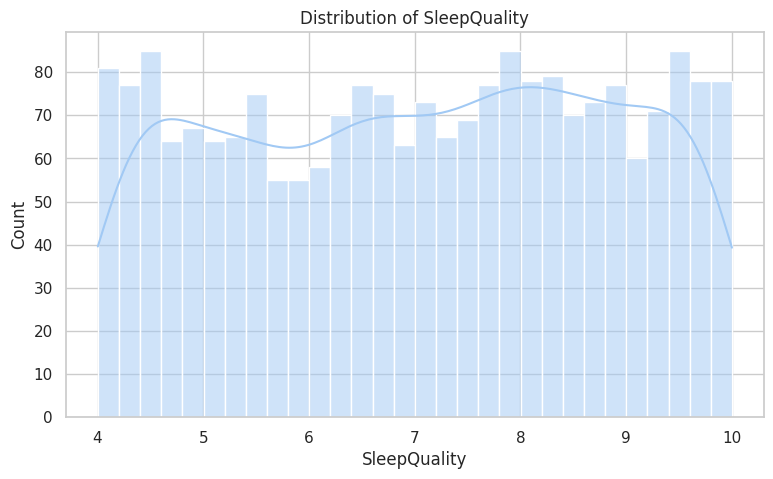

In [10]:
# Lista de columnas específicas que deseas graficar
columns_to_plot = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality']  

# Graficar histograma para cada columna en la lista específica
for column in columns_to_plot:
    plt.figure(figsize=(9, 5))
    sns.histplot(data=df, x=column, kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()

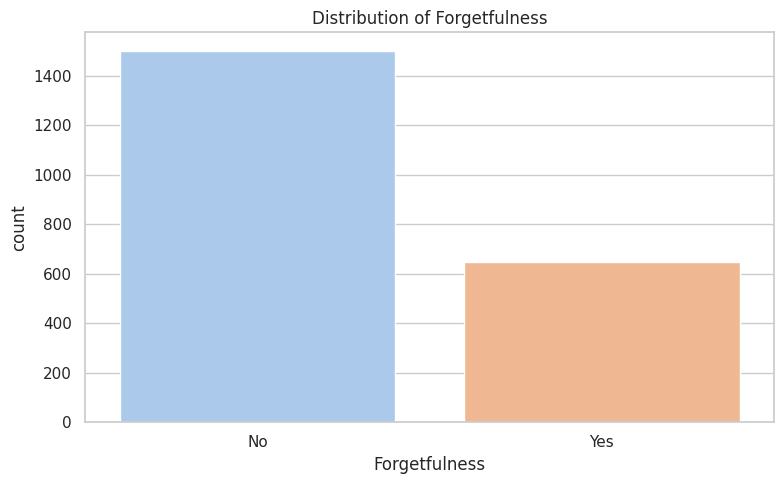

In [11]:
# Set custom labels
labels = ["No", "Yes"]
ticks = range(len(labels))

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the count plot
sns.countplot(data=df, x='Forgetfulness', ax=ax, palette=sns.color_palette("pastel"))
ax.set_title('Distribution of Forgetfulness')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

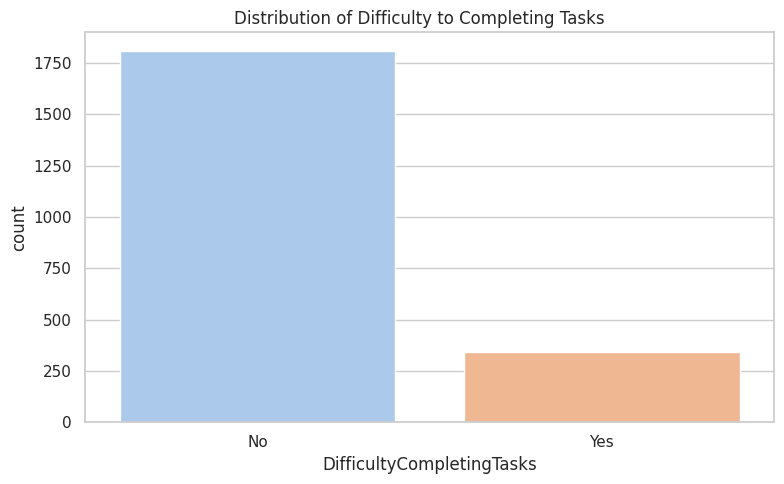

In [12]:
# Set custom labels
labels = ["No", "Yes"]
ticks = range(len(labels))

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the count plot
sns.countplot(data=df, x='DifficultyCompletingTasks', ax=ax, palette=sns.color_palette("pastel"))
ax.set_title('Distribution of Difficulty to Completing Tasks    ')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

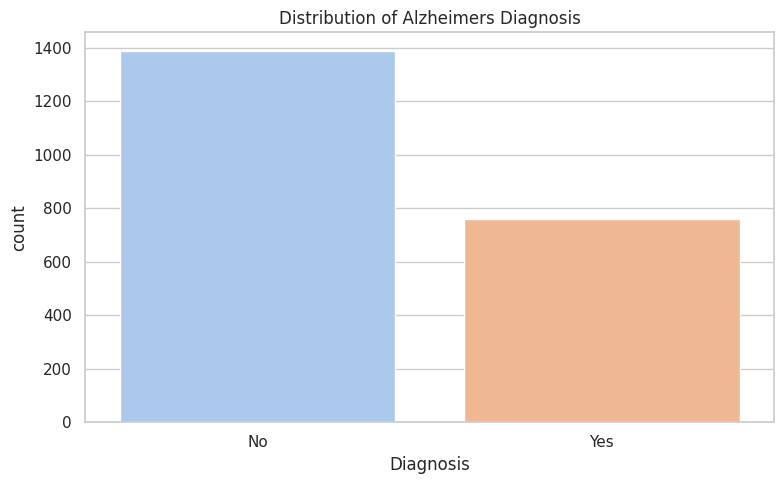

In [13]:
# Set custom labels
labels = ["No", "Yes"]
ticks = range(len(labels))

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the count plot
sns.countplot(data=df, x='Diagnosis', ax=ax, palette=sns.color_palette("pastel"))
ax.set_title('Distribution of Alzheimers Diagnosis')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

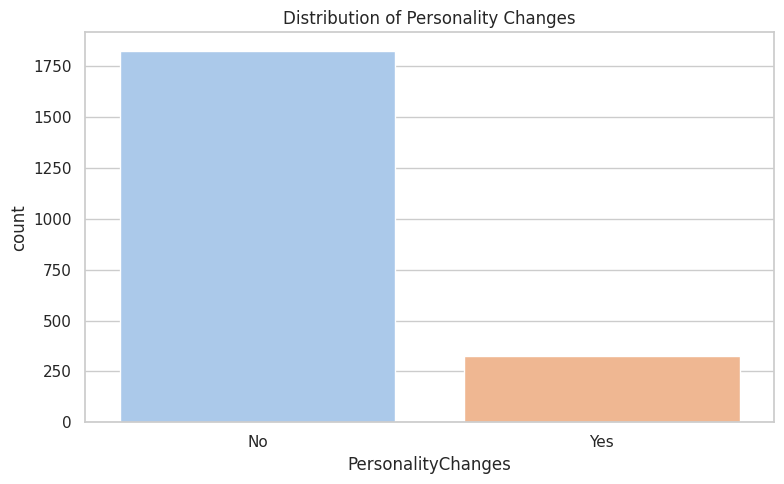

In [14]:
# Set custom labels
labels = ["No", "Yes"]
ticks = range(len(labels))

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the count plot
sns.countplot(data=df, x='PersonalityChanges', ax=ax, palette=sns.color_palette("pastel"))
ax.set_title('Distribution of Personality Changes')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

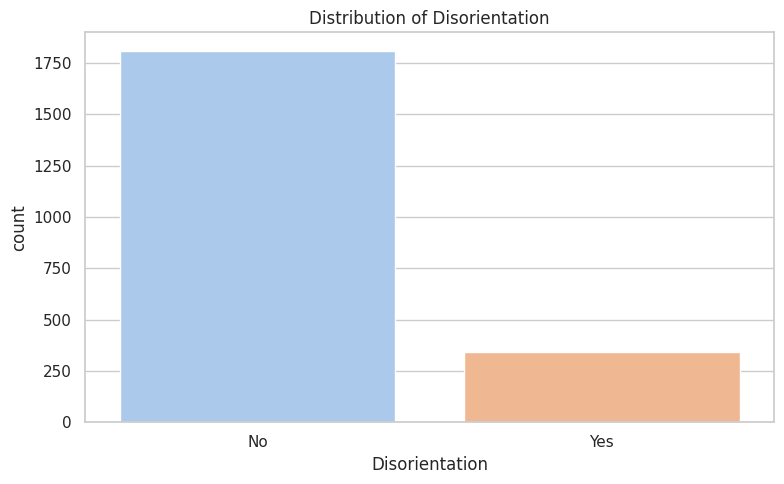

In [15]:
# Set custom labels
labels = ["No", "Yes"]
ticks = range(len(labels))

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the count plot
sns.countplot(data=df, x='Disorientation', ax=ax, palette=sns.color_palette("pastel"))
ax.set_title('Distribution of Disorientation')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

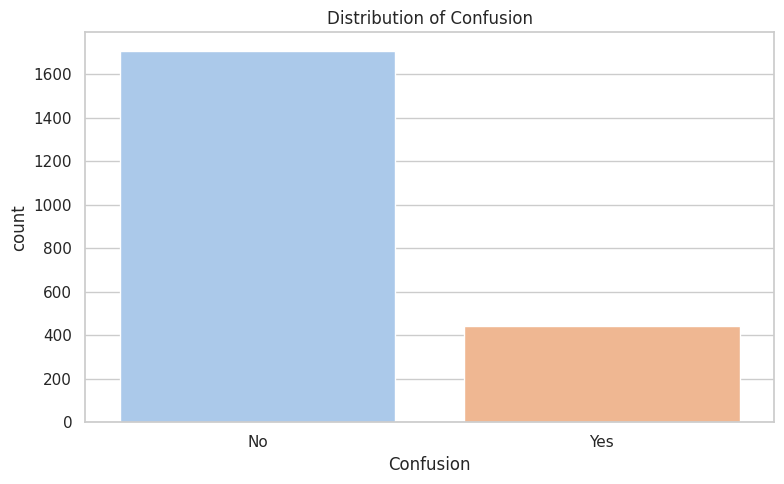

In [16]:
# Set custom labels
labels = ["No", "Yes"]
ticks = range(len(labels))

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the count plot
sns.countplot(data=df, x='Confusion', ax=ax, palette=sns.color_palette("pastel"))
ax.set_title('Distribution of Confusion')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

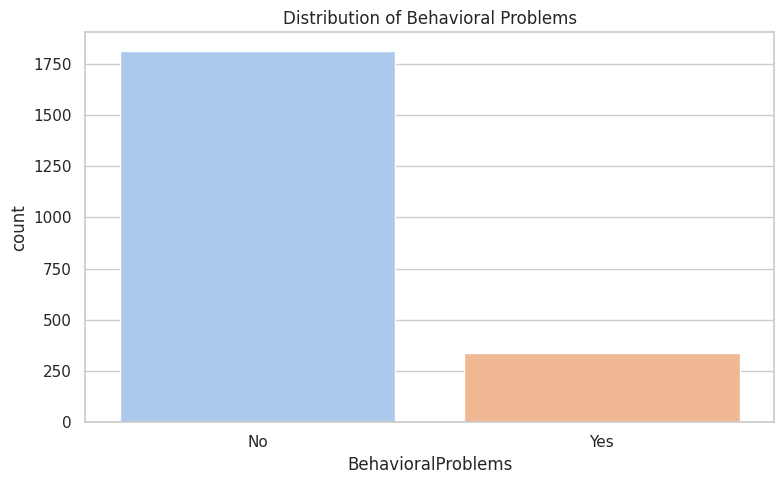

In [17]:
# Set custom labels
labels = ["No", "Yes"]
ticks = range(len(labels))

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the count plot
sns.countplot(data=df, x='BehavioralProblems', ax=ax, palette=sns.color_palette("pastel"))
ax.set_title('Distribution of Behavioral Problems')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

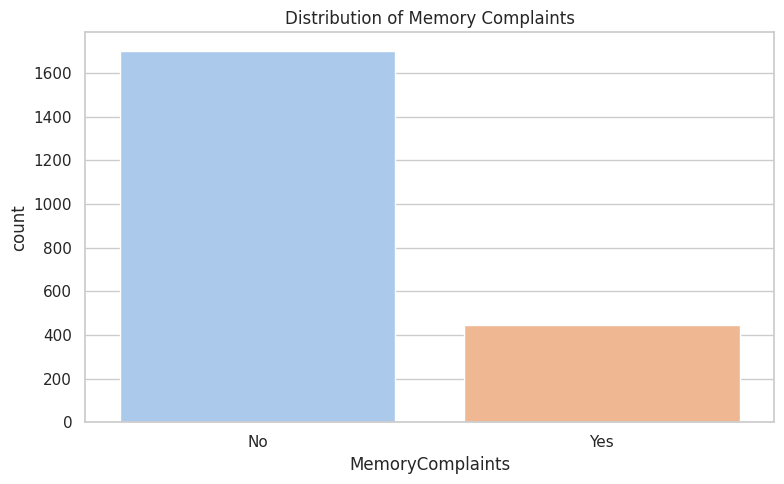

In [18]:
# Set custom labels
labels = ["No", "Yes"]
ticks = range(len(labels))

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the count plot
sns.countplot(data=df, x='MemoryComplaints', ax=ax, palette=sns.color_palette("pastel"))
ax.set_title('Distribution of Memory Complaints')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

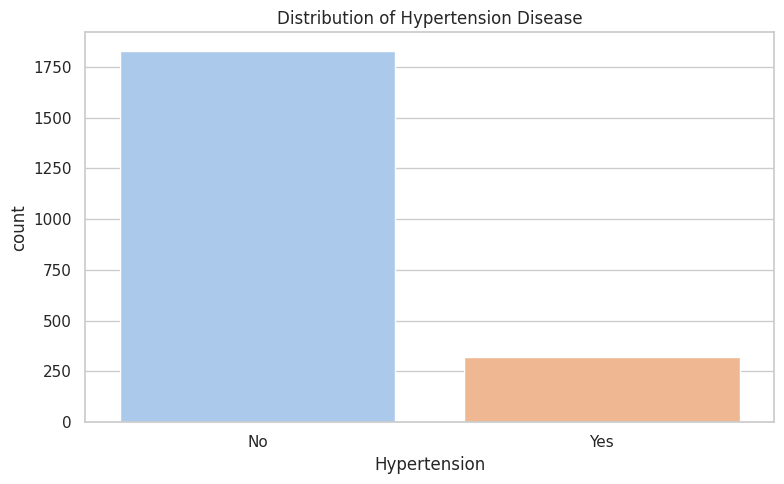

In [19]:
# Set custom labels
labels = ["No", "Yes"]
ticks = range(len(labels))

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the count plot
sns.countplot(data=df, x='Hypertension', ax=ax, palette=sns.color_palette("pastel"))
ax.set_title('Distribution of Hypertension Disease')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

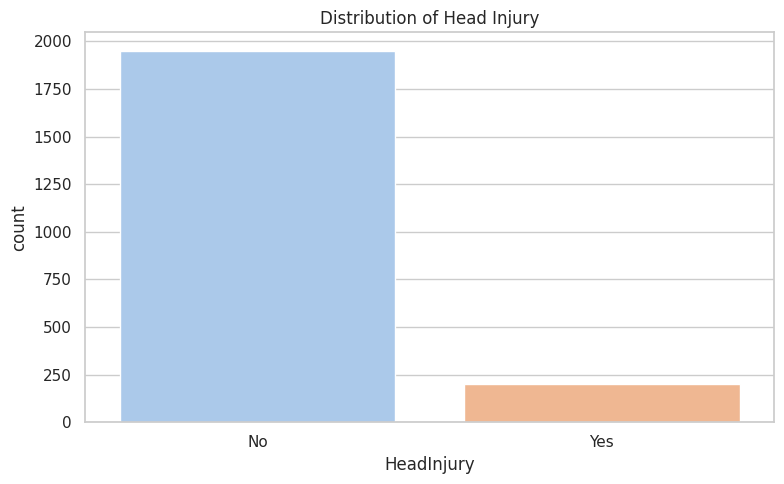

In [20]:
# Set custom labels
labels = ["No", "Yes"]
ticks = range(len(labels))

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the count plot
sns.countplot(data=df, x='HeadInjury', ax=ax, palette=sns.color_palette("pastel"))
ax.set_title('Distribution of Head Injury')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

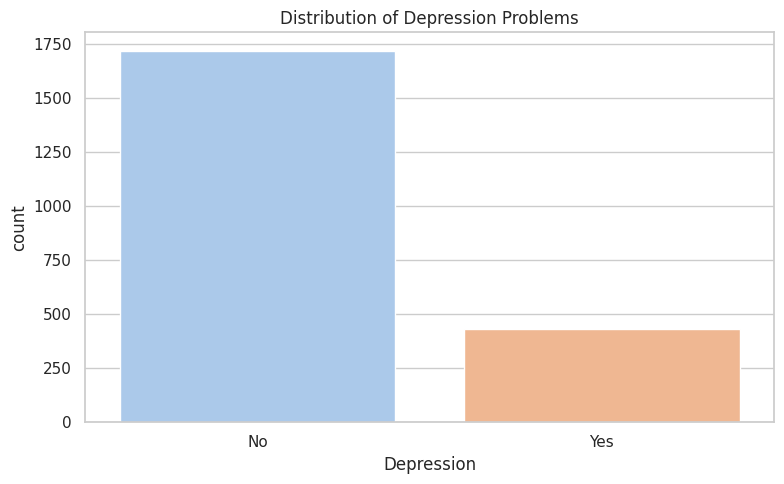

In [21]:
# Set custom labels
labels = ["No", "Yes"]
ticks = range(len(labels))

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the count plot
sns.countplot(data=df, x='Depression', ax=ax, palette=sns.color_palette("pastel"))
ax.set_title('Distribution of Depression Problems')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

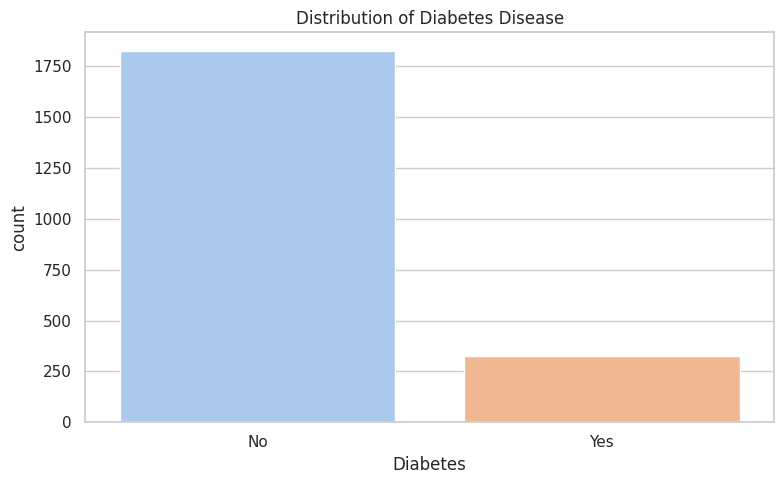

In [22]:
# Set custom labels
labels = ["No", "Yes"]
ticks = range(len(labels))

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the count plot
sns.countplot(data=df, x='Diabetes', ax=ax, palette=sns.color_palette("pastel"))
ax.set_title('Distribution of Diabetes Disease')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

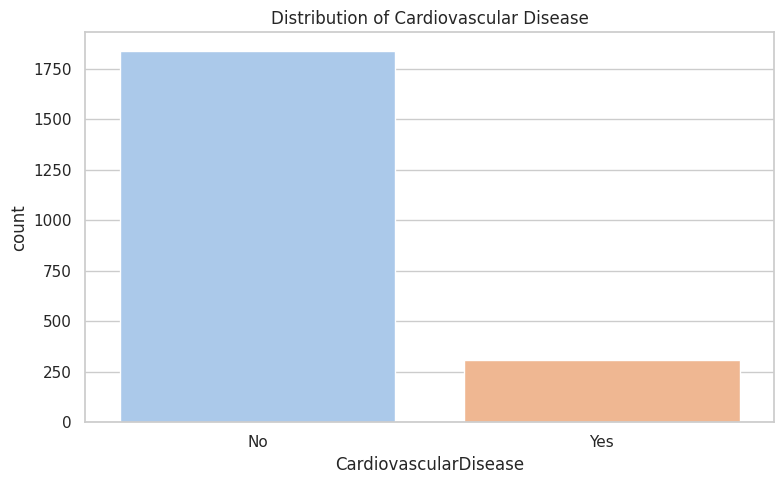

In [23]:
# Set custom labels
labels = ["No", "Yes"]
ticks = range(len(labels))

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the count plot
sns.countplot(data=df, x='CardiovascularDisease', ax=ax, palette=sns.color_palette("pastel"))
ax.set_title('Distribution of Cardiovascular Disease')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

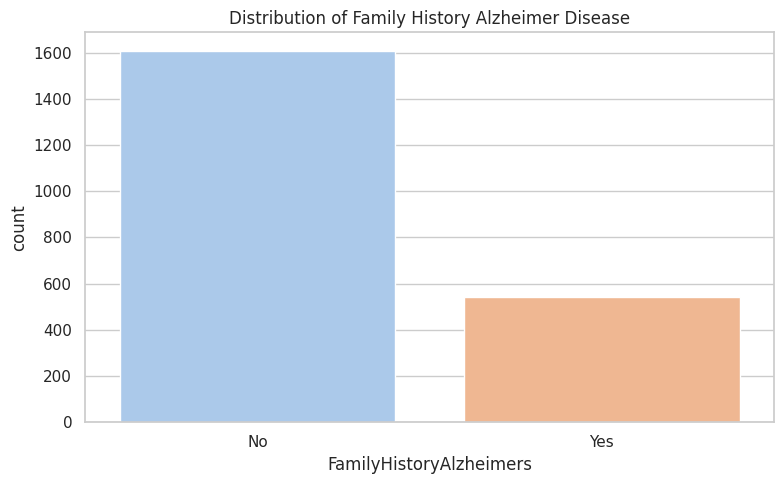

In [24]:
# Set custom labels
labels = ["No", "Yes"]
ticks = range(len(labels))

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the count plot
sns.countplot(data=df, x='FamilyHistoryAlzheimers', ax=ax, palette=sns.color_palette("pastel"))
ax.set_title('Distribution of Family History Alzheimer Disease')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

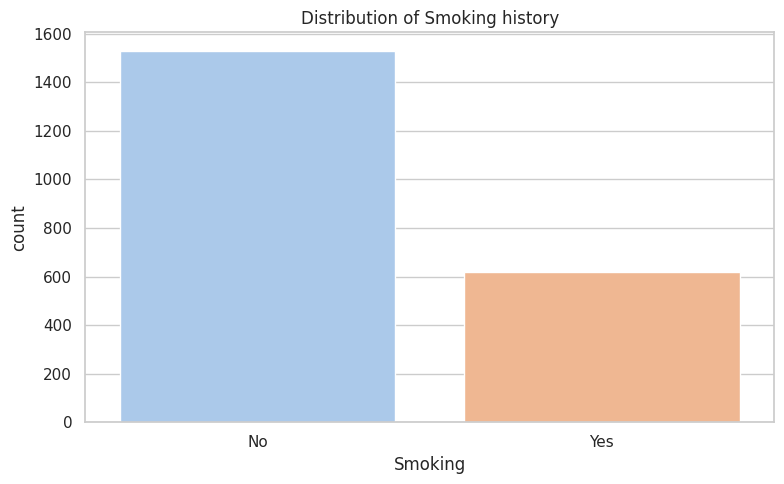

In [25]:
# Set custom labels
labels = ["No", "Yes"]
ticks = range(len(labels))

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the count plot
sns.countplot(data=df, x='Smoking', ax=ax, palette=sns.color_palette("pastel"))
ax.set_title('Distribution of Smoking history')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

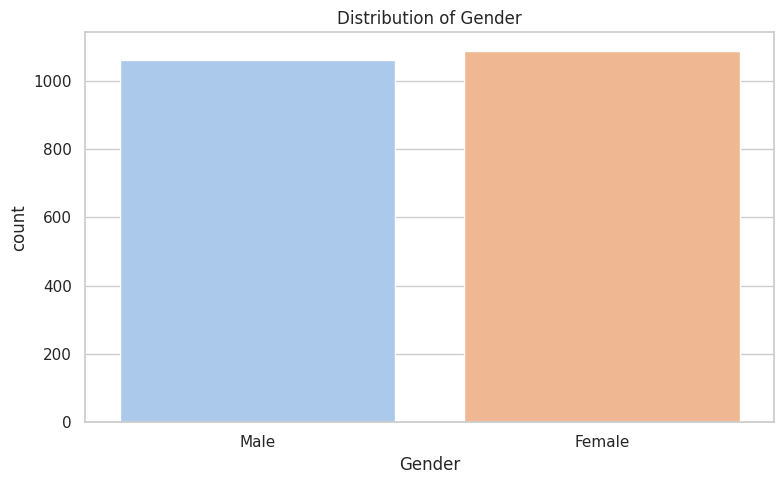

In [26]:
# Set custom labels
labels = ["Male", "Female"]
ticks = range(len(labels))

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the count plot
sns.countplot(data=df, x='Gender', ax=ax, palette=sns.color_palette("pastel"))
ax.set_title('Distribution of Gender')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

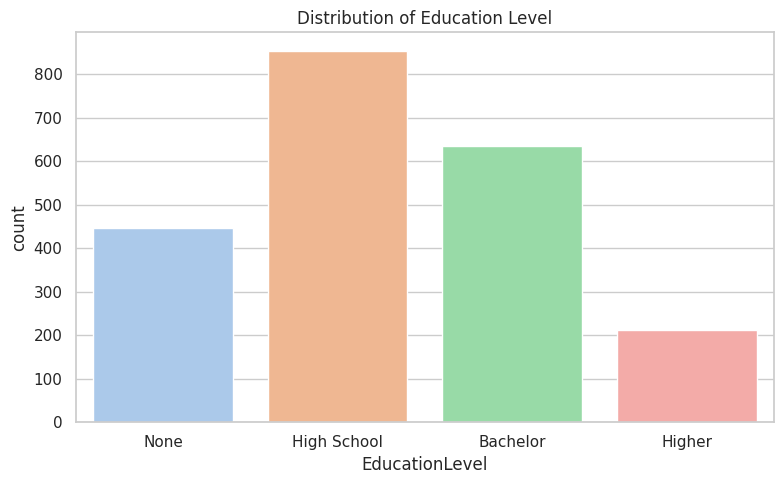

In [27]:
# Set custom labels
labels = ["None", "High School", 'Bachelor', "Higher"]
ticks = range(len(labels))

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the count plot
sns.countplot(data=df, x='EducationLevel', ax=ax, palette=sns.color_palette("pastel"))
ax.set_title('Distribution of Education Level')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

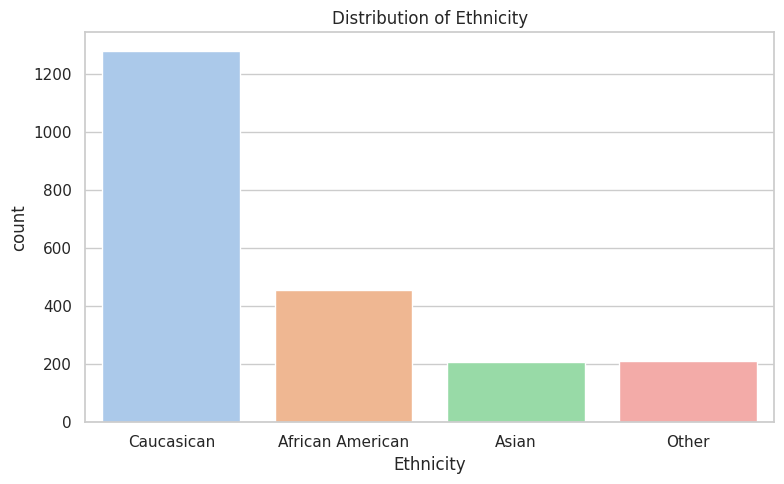

In [28]:
# Set custom labels
labels = ["Caucasican", "African American", 'Asian', "Other"]
ticks = range(len(labels))

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the count plot
sns.countplot(data=df, x='Ethnicity', ax=ax, palette=sns.color_palette("pastel"))
ax.set_title('Distribution of Ethnicity')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

<a id="5"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:90%; font-family:Pacifico; background-color:skyblue; overflow:hidden"><b> 5. Data Pre-processing </b></div>

In [29]:
X=df.drop('Diagnosis', axis=1)

In [30]:
X.shape

(2149, 32)

In [31]:
y = df['Diagnosis'].copy()

In [32]:
y.shape

(2149,)

<a id="5.1"></a>
## <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:90%; font-family:Pacifico; background-color:skyblue; overflow:hidden"><b> 5.1. Principal Component Analyisis (PCA) </b></div>

In [33]:
from sklearn.decomposition import PCA
pca = PCA(0.99)
X_pca = pca.fit_transform(X)
X_pca

array([[ 66.04780538, -61.62469741, -32.33767979, ...,  18.36238094,
         -1.89950898,   6.60366203],
       [-66.41091089,  68.47725542,  10.83043653, ...,  25.6209268 ,
         13.65823178,   5.86799181],
       [144.41201662,  41.26782829, -50.09439198, ..., -25.76506805,
         -1.16671386,  -7.12757009],
       ...,
       [-66.71536456,  32.8977297 ,  -4.47111011, ..., -27.85809961,
          2.20968698,   3.03774281],
       [ 82.44690565, -66.58270488, -33.29695444, ...,  -5.34524558,
          4.02385731,  -9.92343359],
       [ 11.05124859, -18.03853513, -64.96979164, ...,  12.83613509,
         -3.02269517,  -3.60876397]])

<a id="5.2"></a>
## <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:90%; font-family:Pacifico; background-color:skyblue; overflow:hidden"><b> 5.2. Data Split </b></div>

In [34]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [35]:
X_pca.shape

(2149, 8)

In [36]:
len(X_train_pca)

1719

In [37]:
len(X_test_pca)

430

<a id="5.3"></a>
## <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:90%; font-family:Pacifico; background-color:skyblue; overflow:hidden"><b> 5.3. Normalization </b></div>

In [38]:
# Standardize the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(X_train_pca)


scaled_X_train = scaler.transform(X_train_pca)

In [39]:
scaled_X_train

array([[ 0.7123096 , -1.34373701,  1.40143637, ..., -0.82584119,
         1.28886463,  1.32065639],
       [-0.53266497,  0.99678942,  1.49671182, ..., -0.25687538,
        -0.55285368, -0.81805691],
       [ 0.52465237, -1.05362834, -0.47822858, ..., -1.21080784,
         0.77668886,  0.85614154],
       ...,
       [ 1.62867682,  1.51318684, -1.3214026 , ..., -1.56775869,
         1.01701674,  1.67754782],
       [-1.08537422,  0.09838924,  1.43748714, ...,  0.72886106,
         1.58702037, -0.92064742],
       [-1.11330162, -1.10578519,  0.99572866, ...,  0.93967861,
        -0.32267051, -0.92992273]])

In [40]:
# Transform the data
scaled_X_test = scaler.transform(X_test_pca)

In [41]:
scaled_X_test

array([[ 0.21973033, -1.58590437, -0.07834155, ...,  0.75955393,
         1.44733345,  0.06222212],
       [-1.28554341, -0.05770791, -1.62950842, ..., -1.43727029,
         0.10500899,  0.05464749],
       [ 0.73033364,  1.78786826, -1.32555331, ...,  0.39349766,
        -0.16357812, -0.48703867],
       ...,
       [-0.04219161,  1.18424478,  1.57119092, ...,  1.07471507,
        -1.37331192, -1.14069936],
       [-1.46516746, -1.32610904, -0.91467124, ...,  0.04845363,
        -0.18566231, -0.32243977],
       [-0.49375039, -0.41251094, -1.91921495, ..., -1.20207348,
         0.11552202,  1.24438265]])

<a id="6"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:90%; font-family:Pacifico; background-color:skyblue; overflow:hidden"><b> 6. Build Model (Neural Network) </b></div>

In [42]:
import tensorflow as tf
from tensorflow import keras

#I will create a neural network
#I will have same number of neurons as columns, so 8
#we use relu as activation function because is easy to compute relu

model_ANN=keras.Sequential([
    keras.layers.Dense(8,input_shape=(8,),activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(2, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
    
])

#loss is binary_crossentropy because our output is binary, zero and one
#adam is a very commonly used optimizer
model_ANN.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
)

model_ANN.fit(scaled_X_train,y_train,epochs=70)

2024-08-04 13:44:49.647730: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-04 13:44:49.647870: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-04 13:44:49.839401: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/70
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3661 - loss: 0.7859
Epoch 2/70
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4788 - loss: 0.7188
Epoch 3/70
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5611 - loss: 0.6926
Epoch 4/70
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5960 - loss: 0.6831
Epoch 5/70
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6184 - loss: 0.6767
Epoch 6/70
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6418 - loss: 0.6689
Epoch 7/70
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6536 - loss: 0.6637
Epoch 8/70
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6551 - loss: 0.6605
Epoch 9/70
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6119 - loss: 0.6703
Epoch 10/70
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6447 - loss: 0.6594
Epoch 11/70
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6445 - loss: 0.6563
Epoch 12/70
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6521 - lo

In [43]:
model_ANN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 365 (1.43 KB)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 244 (980.00 B)

<a id="7"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:90%; font-family:Pacifico; background-color:skyblue; overflow:hidden"><b> 7. Evaluate the model </b></div>

In [44]:
y_pred_ANN=model_ANN.predict(scaled_X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [45]:
y_pred_ANN=y_pred_ANN.round().astype(int)

In [46]:
#This is plotting the performance of over all model
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred_ANN))

              precision    recall  f1-score   support

           0       0.65      0.88      0.75       277
           1       0.41      0.14      0.21       153

    accuracy                           0.62       430
   macro avg       0.53      0.51      0.48       430
weighted avg       0.56      0.62      0.56       430



In [47]:
cm=confusion_matrix(y_test,y_pred_ANN)
cm

array([[245,  32],
       [131,  22]])

Text(91.25, 0.5, 'Truth')

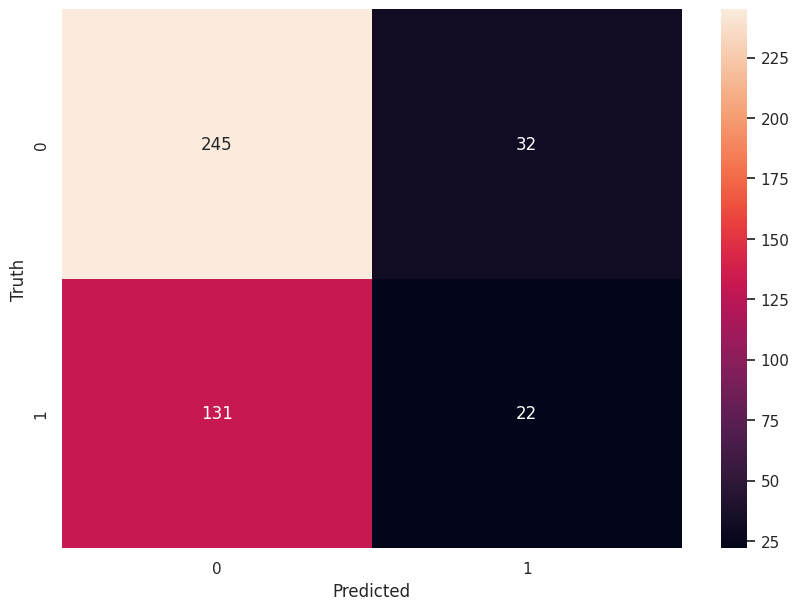

In [48]:
import seaborn as sns
cm1=tf.math.confusion_matrix(y_test,y_pred_ANN)
plt.figure(figsize=(10,7))
sns.heatmap(cm1,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#Anything which is on a diagonal is a correct prediction

<a id="8"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:90%; font-family:Pacifico; background-color:skyblue; overflow:hidden"><b> 8. Conclusion </b></div>

In this Kaggle Notebook, Alzheimer's disease is predicted. First, we performed an exploratory data analysis using various charts to understand the relationships among the features as well as the target variable.

Additionally, we developed the data preprocessing to determine the features with further repercussion on the prediction of Alzheimer's disease, as well as the data splitting and normalization.

Subsequently, we built the model by training an artificial neural network, reaching an accuracy higher than 60%, and evaluated the trained model, concluding that the model is not overfitting.

Thank you for exploring this notebook!
If you find it helpful, please consider upvoting it ❤️.

Your support is always appreciated 🤩!

<div style="text-align: center;">
    <img src="https://media.istockphoto.com/id/1391352876/vector/thank-you-colorful-typography-banner.jpg?s=612x612&w=0&k=20&c=jzm-E-RXHtLDQNxs_8RNe_388gbl7t7dEsYuyC0xtF8=" alt="alzheimers" style="width:100%; height:auto; border-radius: 30px;">
</div>

